In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.model_selection import train_test_split
from keras import optimizers
# Keras imports
from keras.models import Sequential
#from keras.layers import Dense
import time
from keras.layers import Flatten
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error


/usr/local/lib/python3.5/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [2]:
dataframe = pd.read_csv('UNRATE.csv')

In [3]:
dataframe.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [4]:
dataframe1 = dataframe[['UNRATE']] # the four columns are Open,High,Low and Close.
dataframe1.head()

,UNRATE
0,3.4
1,3.8
2,4.0
3,3.9
4,3.5


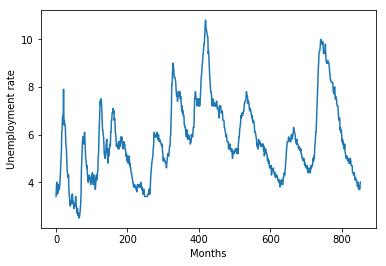

In [5]:
plt.plot(dataframe1[0:])
plt.xlabel('Months')
plt.ylabel('Unemployment rate')
plt.savefig("UNRATE PERFECT.eps", format='eps', dpi=1000)
plt.show()

### WE Scale OUR DATA

In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe1 = scaler.fit_transform(dataframe1)

In [107]:
dataframe1[0:5]

array([[0.10843373],
       [0.15662651],
       [0.18072289],
       [0.1686747 ],
       [0.12048193]])

## We create labels for our datasets.

In [108]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [109]:
dataX,dataY=create_dataset(dataframe1,look_back=1)

## We split our dataset using 70 percent for training and 30 percent for testing.

In [110]:
train_size = int(len(dataframe1) * 0.7)
test_size = len(dataframe1) - train_size
train, test = dataframe1[0:train_size,:], dataframe1[train_size:len(dataframe1),:]

In [111]:
look_back = 12 # window size of 12.

# Split the data into training features and training targets
trainX, trainY = create_dataset(train, look_back)

# Split the data into testing features and testing targets
testX, testY = create_dataset(test, look_back)

In [112]:
dataframe1[0:5]

array([[0.10843373],
       [0.15662651],
       [0.18072289],
       [0.1686747 ],
       [0.12048193]])

In [113]:
dataX[0:5]

array([[0.10843373],
       [0.15662651],
       [0.18072289],
       [0.1686747 ],
       [0.12048193]])

In [114]:
dataY[0:5]

array([0.15662651, 0.18072289, 0.1686747 , 0.12048193, 0.13253012])

In [115]:
train[0:16]

array([[0.10843373],
       [0.15662651],
       [0.18072289],
       [0.1686747 ],
       [0.12048193],
       [0.13253012],
       [0.13253012],
       [0.1686747 ],
       [0.15662651],
       [0.14457831],
       [0.15662651],
       [0.18072289],
       [0.21686747],
       [0.26506024],
       [0.30120482],
       [0.3373494 ]])

In [116]:
trainX[0:5], trainY[0:5]

(array([[0.10843373, 0.15662651, 0.18072289, 0.1686747 , 0.12048193,
         0.13253012, 0.13253012, 0.1686747 , 0.15662651, 0.14457831,
         0.15662651, 0.18072289],
        [0.15662651, 0.18072289, 0.1686747 , 0.12048193, 0.13253012,
         0.13253012, 0.1686747 , 0.15662651, 0.14457831, 0.15662651,
         0.18072289, 0.21686747],
        [0.18072289, 0.1686747 , 0.12048193, 0.13253012, 0.13253012,
         0.1686747 , 0.15662651, 0.14457831, 0.15662651, 0.18072289,
         0.21686747, 0.26506024],
        [0.1686747 , 0.12048193, 0.13253012, 0.13253012, 0.1686747 ,
         0.15662651, 0.14457831, 0.15662651, 0.18072289, 0.21686747,
         0.26506024, 0.30120482],
        [0.12048193, 0.13253012, 0.13253012, 0.1686747 , 0.15662651,
         0.14457831, 0.15662651, 0.18072289, 0.21686747, 0.26506024,
         0.30120482, 0.3373494 ]]),
 array([0.21686747, 0.26506024, 0.30120482, 0.3373494 , 0.43373494]))

In [117]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (584, 12)
Train Y shape (584,)
Test X shape  (243, 12)
Test Y shape  (243,)


## We reshape our data

In [118]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [119]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (584, 12, 1)
Train Y shape (584,)
Test X shape  (243, 12, 1)
Test Y shape  (243,)


In [120]:
model = Sequential()
model.add(LSTM(30,activation='relu',input_shape=(12,1), return_sequences = True,stateful=True,batch_size=1))
model.add(Dropout(0.5))
model.add(LSTM(20, return_sequences = True,stateful=True,batch_size=1))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1))#activation="linear"))
#model.add(Flatten())
model.add(Activation("linear"))
model.compile(optimizer='adam',loss='mse', metrics=["mae", "mse"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (1, 12, 30)               3840      
_________________________________________________________________
dropout_7 (Dropout)          (1, 12, 30)               0         
_________________________________________________________________
lstm_8 (LSTM)                (1, 12, 20)               4080      
_________________________________________________________________
dropout_8 (Dropout)          (1, 12, 20)               0         
_________________________________________________________________
flatten_4 (Flatten)          (1, 240)                  0         
_________________________________________________________________
dense_4 (Dense)              (1, 1)                    241       
_________________________________________________________________
activation_4 (Activation)    (1, 1)                    0         
Total para

In [121]:
n_epochs = 100
valid_score = 0.2
start = time.time()
result=model.fit(trainX,trainY,batch_size=1,nb_epoch=n_epochs,validation_split=valid_score,verbose=0)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


In [122]:
hist = pd.DataFrame(result.history)
hist['epoch'] = result.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.002510,0.037148,0.002510,0.000843,0.024465,0.000843,95
96,0.002461,0.038586,0.002461,0.000417,0.016084,0.000417,96
97,0.002361,0.037938,0.002361,0.000477,0.017568,0.000477,97
98,0.002247,0.037256,0.002247,0.000430,0.016401,0.000430,98
99,0.002097,0.035394,0.002097,0.000375,0.015287,0.000375,99


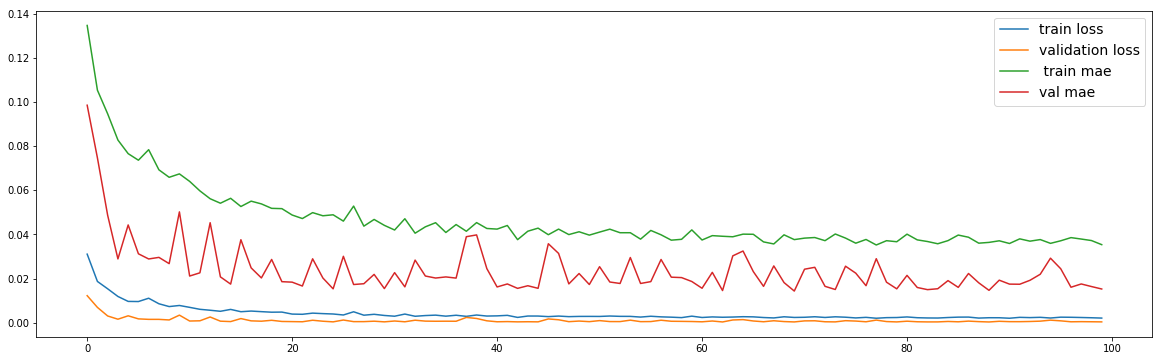

In [123]:
pyplot.figure(figsize=(20,6))
pyplot.plot(result.epoch, result.history['loss'], label="train loss")
pyplot.plot(result.epoch, result.history['val_loss'], label="validation loss")
pyplot.plot(result.epoch, result.history['mean_absolute_error'], label=" train mae")
pyplot.plot(result.epoch, result.history['val_mean_absolute_error'], label="val mae")
pyplot.legend(fontsize=14)
pyplot.show()

In [124]:
# generate predictions for training
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataframe1)-1, :] = testPredict

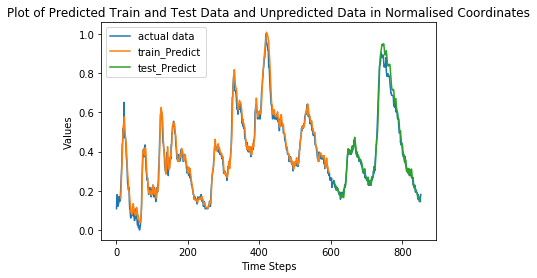

In [125]:
plt.plot(dataframe1,label="actual data")
plt.plot(trainPredictPlot, label="train_Predict")
plt.plot(testPredictPlot,label="test_Predict")
plt.title('Plot of Predicted Train and Test Data and Unpredicted Data in Normalised Coordinates')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

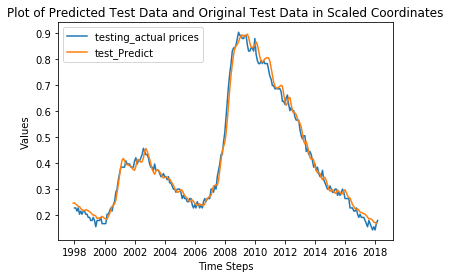

In [91]:
#plt.figure(figsize=(15,7))

plt.plot([i for i in range(610,853)],dataframe1[610:,],
         label="testing_actual prices")
plt.plot(testPredictPlot,label="test_Predict")
plt.title('Plot of Predicted Test Data and Original Test Data in Scaled Coordinates')
plt.xlabel('Time Steps')
plt.ylabel('Values')

xpos=[i for i in range(610,853,24)]

plt.xticks(xpos,[1998+(i*2) for i in range(len(xpos))])
plt.legend()
plt.show()


In [92]:
from sklearn.metrics import mean_squared_error
trainPredict_inv = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform([trainY])
testPredict_inv = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform([testY])
data=dataframe[['UNRATE']]
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inv[0], trainPredict_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_inv[0], testPredict_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.26 RMSE
Test Score: 0.19 RMSE


In [93]:
mean_squared_error(testY_inv[0],testPredict_inv[:,0])

0.03546157585468516

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testY_inv[0],testPredict_inv[:,0])

0.1464050491160326

## Plot in Original Coordinate

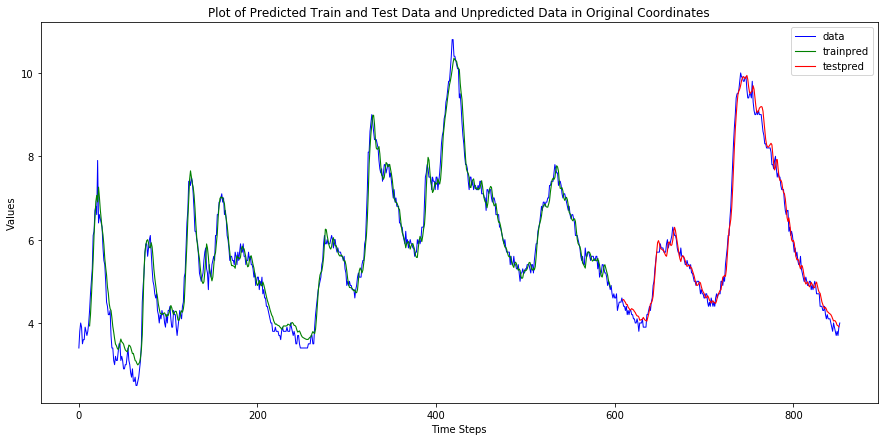

In [96]:
ItrainPredictPlot = np.empty_like(dataframe1)
ItrainPredictPlot[:, :] = np.nan    # Note that points with nan value are not plotted by matplotlib
ItrainPredictPlot[look_back:len(trainPredict_inv)+look_back, :] = trainPredict_inv
# shift test predictions for plotting
ItestPredictPlot = np.empty_like(data)
ItestPredictPlot[:, :] = np.nan
ItestPredictPlot[len(trainPredict_inv)+(look_back*2)+1:len(data)-1, :] = testPredict_inv

# plot baseline and predictions
plt.figure(figsize=(15,7))
linewidth=1
dstep=10
plt.plot(data.values,'b',label='data',linewidth=linewidth)
plt.plot(ItrainPredictPlot,'g',label='trainpred',linewidth=linewidth+0.1)
plt.plot(ItestPredictPlot,'r',label='testpred',linewidth=linewidth+0.1)
plt.title('Plot of Predicted Train and Test Data and Unpredicted Data in Original Coordinates')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

### Plot of actual test data against predicted in original coordinate

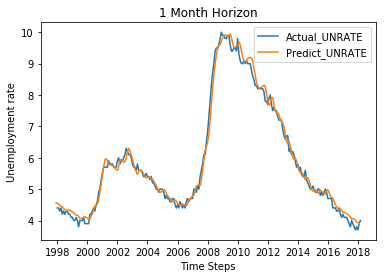

In [97]:
plt.plot([i for i in range(610,853)],data.values[610:,],
         label="Actual_UNRATE")
plt.plot(ItestPredictPlot,label="Predict_UNRATE")
plt.legend()
plt.title('1 Month Horizon')
plt.xlabel('Time Steps')
plt.ylabel('Unemployment rate')
xpos=[i for i in range(610,853,24)]
plt.xticks(xpos,[1998+(i*2) for i in range(len(xpos))])
plt.savefig("1 Month Horizon_Encoder(ENCODEFH1BBnice).eps", format='eps', dpi=1000)
plt.show()


In [98]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Calculation of the Mean Absolute Percentage Error for the test Data

In [99]:
mean_absolute_percentage_error(testY_inv[0],testPredict_inv[:,0])

2.563192383711327

## Calculation of the Mean Absolute  Error for the test Data

In [100]:
mean_absolute_error(testY_inv[0],testPredict_inv[:,0])

0.1464050491160326

## Calculation of the Root Mean Square Error Error for the test Data

In [101]:
testScore = math.sqrt(mean_squared_error(testY_inv[0], testPredict_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.19 RMSE
